<a href="https://colab.research.google.com/github/Oleksy1121/Machine-Learning/blob/main/Udemy/02_braki_danych.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [ ]:
data = {
    'size' : ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color' : ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender' : ['fema;e', 'male', np.nan, 'female', 'female', 'male'],
    'price' : [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight' : [500, 450, 300, np.nan, 410, np.nan],
    'bought' : ['yes', 'no', 'yes', 'no','yes', 'no']
}

df_raw = pd.DataFrame(data = data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


Utworzenie kopii

In [ ]:
df = df_raw.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [ ]:
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
df.isnull().sum().sum()

5

In [ ]:
df.isnull().sum()/len(df)   ### Pokazuje braki danych w %

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

Uzupełnienie braków - SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

#strategy 'mean', 'median', 'most_fraquent', 'constant'
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [ ]:
imputer.statistics_

array([415.])

In [ ]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [ ]:
df[['weight']] = imputer.fit_transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [ ]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [ ]:
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [ ]:
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [ ]:
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [ ]:
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [ ]:
df[pd.notnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [ ]:
df

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [ ]:
df['size']

0     XL
1      L
2      M
3    NaN
4      M
5      M
Name: size, dtype: object

In [ ]:
df['size'].fillna(value='L', inplace = True)
df

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [ ]:
df.dropna()  #pokazyje wiersze zawierające wszystkie dane

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [ ]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,fema;e,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


Braki danych w szeregach czasowych

In [11]:
data1 = {'price': [109, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start= '01-01-2020 09:00', end='01-01-2020 18:00', periods=10)
df1 = pd.DataFrame(data = data1, index=date_range)
df1

,price
2020-01-01 09:00:00,109.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


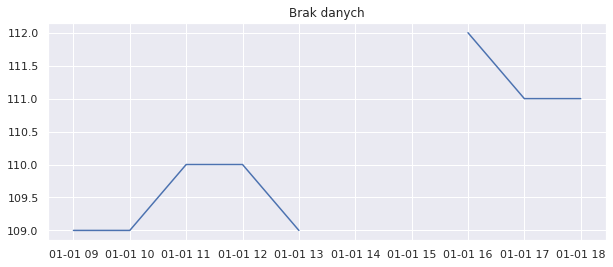

In [14]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns

register_matplotlib_converters()
sns.set()

plt.figure(figsize = (10,4))
plt.title('Brak danych')
_ = plt.plot(df1.price)

In [16]:
import plotly.express as px

df1_plotly = df1.reset_index()
px.line(df1_plotly, 'index', 'price', width = 600, height = 400, title = 'Brak danych w szeregach czasowych')


Usunięcie braków danych

In [19]:
df1_plotly = df1_plotly.dropna()
px.line(df1_plotly, 'index', 'price', width = 600, height = 400, title = 'Brak danych w szeregach czasowych')

Wypełnianie braków wartością 0

In [21]:
df1_plotly = df1.reset_index()
df1_plotly['price_fill'] = df1_plotly['price'].fillna(0)
px.line(df1_plotly, 'index', 'price_fill', width = 600, height = 400, title = 'Brak danych w szeregach czasowych')

Wypełnianie braków średnią

In [22]:
df1_plotly = df1.reset_index()
df1_plotly['price_fill'] = df1_plotly['price'].fillna(df1_plotly['price'].mean())
px.line(df1_plotly, 'index', 'price_fill', width = 600, height = 400, title = 'Brak danych w szeregach czasowych')

Zastosowanie interpolacji

In [23]:
df1_plotly = df1.reset_index()
df1_plotly['price_fill'] = df1_plotly['price'].interpolate()
px.line(df1_plotly, 'index', 'price_fill', width = 600, height = 400, title = 'Brak danych w szeregach czasowych')

Wypełnianie danych metodą forward fill

In [24]:
df1_plotly = df1.reset_index()
df1_plotly['price_fill'] = df1_plotly['price'].fillna(method = 'ffill')
px.line(df1_plotly, 'index', 'price_fill', width = 600, height = 400, title = 'Brak danych w szeregach czasowych')

Metoda backward fill

In [25]:
df1_plotly = df1.reset_index()
df1_plotly['price_fill'] = df1_plotly['price'].fillna(method = 'bfill')
px.line(df1_plotly, 'index', 'price_fill', width = 600, height = 400, title = 'Brak danych w szeregach czasowych')